# Homework 8: An MITgcm Tutorial Experiment

Name: Jonathan Manzano

Date: October 15th, 2024

### Overview

In class, we walked through the MITgcm tutorial for the barotropic gyre. In this homework, you'll work through another experiment - the `tutorial_global_oce_latlon` configuration. 

Documentation for this tutorial is additionally provided on the MITgcm documentation page [HERE](https://mitgcm.readthedocs.io/en/latest/examples/global_oce_latlon/global_oce_latlon.html).

Before beginning, import Python modules for manging and plotting data, and define a path to the model directory on your machine:

### Import Pertinent Modules

In [1]:
%matplotlib inline

from pathlib import Path

import cmocean.cm as ccm
import numpy as np
import matplotlib.pyplot as plt

### Model Directory Path

In [2]:
model_dir = Path(
    "/home/jon/sjsu/fall2024/cs185c_s03/MITgcm/verification/tutorial_global_oce_latlon"
)

## Part 1: Plot the model bathymetry

One good way to examine the construction of a model is to plot the bathymetry. The bathymetry for this model is stored in the `input/bathymetry.bin` file. Create a plot of the bathymetry below. Be sure to label your axes and give the plot a colorbar with a sensible color map.

Hint: The grid is stored as a 2D grid with `float32` precision. Look at the `SIZE.h` file to determine the grid shape. 

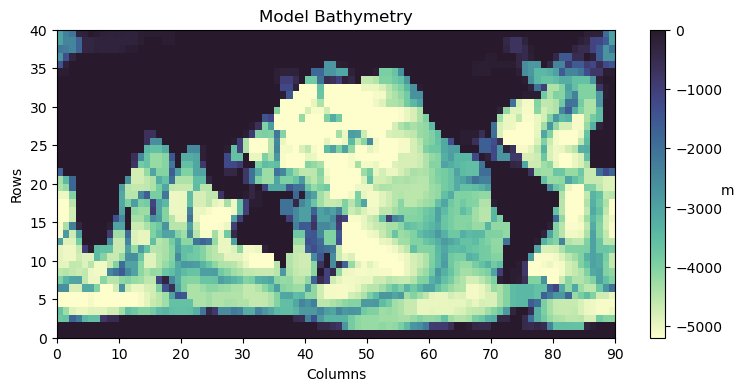

In [3]:
# read in the model bathymetry file and reshape to the grid dimensions
n_rows = 40
n_cols = 90
dx = 20000
dy = 2000
x = np.arange(0, n_cols * dx, dx)
y = np.arange(0, n_rows * dy, dy)
X, Y = np.meshgrid(x, y)
bathy_file = model_dir / "input" / "bathymetry.bin"
bathy_grid = np.fromfile(bathy_file, ">f4").reshape((n_rows, n_cols))

# make a plot of the bathymetry
fig = plt.figure(figsize=(9, 4))

c = plt.pcolormesh(bathy_grid, cmap=ccm.deep)

cbar = plt.colorbar(c)

cbar.set_label("m", rotation=0)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Model Bathymetry")
plt.show()

## Part 2: Compile the Model

Next, compile the model on your machine.

Before you begin your compilation, make two changes to the files in the code directory:

1. In the packages.conf file, remove the lines for `mnc`, `timeave`, and `ptracers` and add a new line for `diagnostics`.
2. Add the `DIAGNOSTICS_SIZE.h` file provided with this notebook.

Once you make these changes, compile the model code.

Refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

### Question:

How many CPUs will this model use on your machine?

#### Answer:

> Determine how many processors (i.e., CPU cores) you will be using in your run, and modify your configuration’s SIZE.h (located in a “modified code” directory, as specified in your genmake2 command-line). In SIZE.h, you will need to set variables nPx*nPy to match the number of processors you will specify in your run script’s MITgcm execution statement (i.e., typically mpirun or some similar command, see Section 3.6.1). Note that MITgcm does not use dynamic memory allocation (a feature of Fortran 90, not FORTRAN 77), so all array sizes, and hence the number of processors to be used in your MPI run, must be specified at compile-time in addition to run-time. More information about the MITgcm WRAPPER, domain decomposition, and how to configure SIZE.h can be found in Section 6.3.

Source: [3. Getting Started with MITgcm](https://mitgcm.readthedocs.io/en/latest/getting_started/getting_started.html)

```
...
     &           nPx =   2,
     &           nPy =   1,
...
```

With `nPx` with the value of 2 and `nPy` with the value of 1:

$$
\begin{align}
\text{Total number of processors} &= nPx (nPy) \\
2 (1) &= 2 \, \text{processors}
\end{align}
$$

Compiling and running with MITgcm, it will use 2 CPUs (processors).

## Part 3: Run the Model

After your compilation is complete, run the model in the `run` directory. 

Before running this model, make the following updates to the default tutorial:

1. In the `data` file, change `nIter=0` to `nIter=70080` and place the the `pickup.0000070080.data`, `pickup.0000070080.meta`, `pickup_cd.0000070080.data` and `pickup_cd.0000070080.meta` files provided with this notebook in your run directory. This will allow you to start the model after it has already been run for several decades.
2. Update the model timesteps to run for a duration of one year. Implement this change by looking in the `data` file to determine the number of seconds for each model timesteps (`deltaTClock`). Then, compute how many timesteps will be needed to run the model for one year by determining how many seconds are in one year (365 days) and dividing by the timestep. Then, update the timesteps on the line `nTimesteps=...,` in the `data` file.
3. In the `data` file, add a new line for `useSingleCpuIO=.TRUE.,` in the `PARM01` section just below the line that says `readBinaryPrec=32,`.
4. In the `data` file, in `PARM03`, update the following three lines as follows:

```
 pChkptFreq= 31536000.,
# dumpFreq=   864000.,
# taveFreq=   864000.,
```
   Note that the comment indicators (`#`) must be in the first column.
   
5. Add the `data.diagnostics` file provided with this notebook into your run directory. This will request the model to output monthly averages of temperature (`THETA`), salinity (`SALT`), zonal velocity (`UVEL`), and meridional velocity (`VVEL`).
6. In the file `data.pkg`, remove the line for `usePTRACERS=.TRUE.,` and add a new line for `useDIAGNOSTICS=.TRUE.,`.

After making these changes, run the model. 

Again, you can refer to the class example or the [Getting Started with MITgcm](https://profmikewood.github.io/ocean_modeling_book/mitgcm/getting_started_with_MITgcm.html) section of the course notes for help.

### Questions:

1. What is the model timestep in seconds? days?
2. How many timesteps are required to run the model for one year?

#### Answers:

1. The value of `deltaTClock` is $86,400 \, \text{seconds}$.

$$
86400 \cancel{\text{seconds}} \, \times \frac{1 \, \cancel{\text{minute}}}{60 \, \cancel{\text{seconds}}} \, \times \frac{1 \, \cancel{\text{hour}}}{60 \, \cancel{\text{minutes}}} \times \frac{1 \, \text{day}}{24 \, \cancel{\text{hours}}} = 1 \, \text{day}
$$

$86,400 \, \text{seconds}$ is computationally equivalent to $1 \, \text{day}$.

### Part 4: Assess the Model Results
Upon successful completion of your model run, you should have the following files: `THETA.0000070445.data`, `SALT.0000070445.data`, `UVEL.0000070445.data`, and `VVEL.0000070445.data`. These files contain the surface fields for temperature, salinity, zonal velocity, and meridional velocity in the month of December. 

Read these files into four separate grids and make a 2x2 set of subplots showing the surface temperature, salinity, zonal velocity, and meridional velocity simulated by the model.

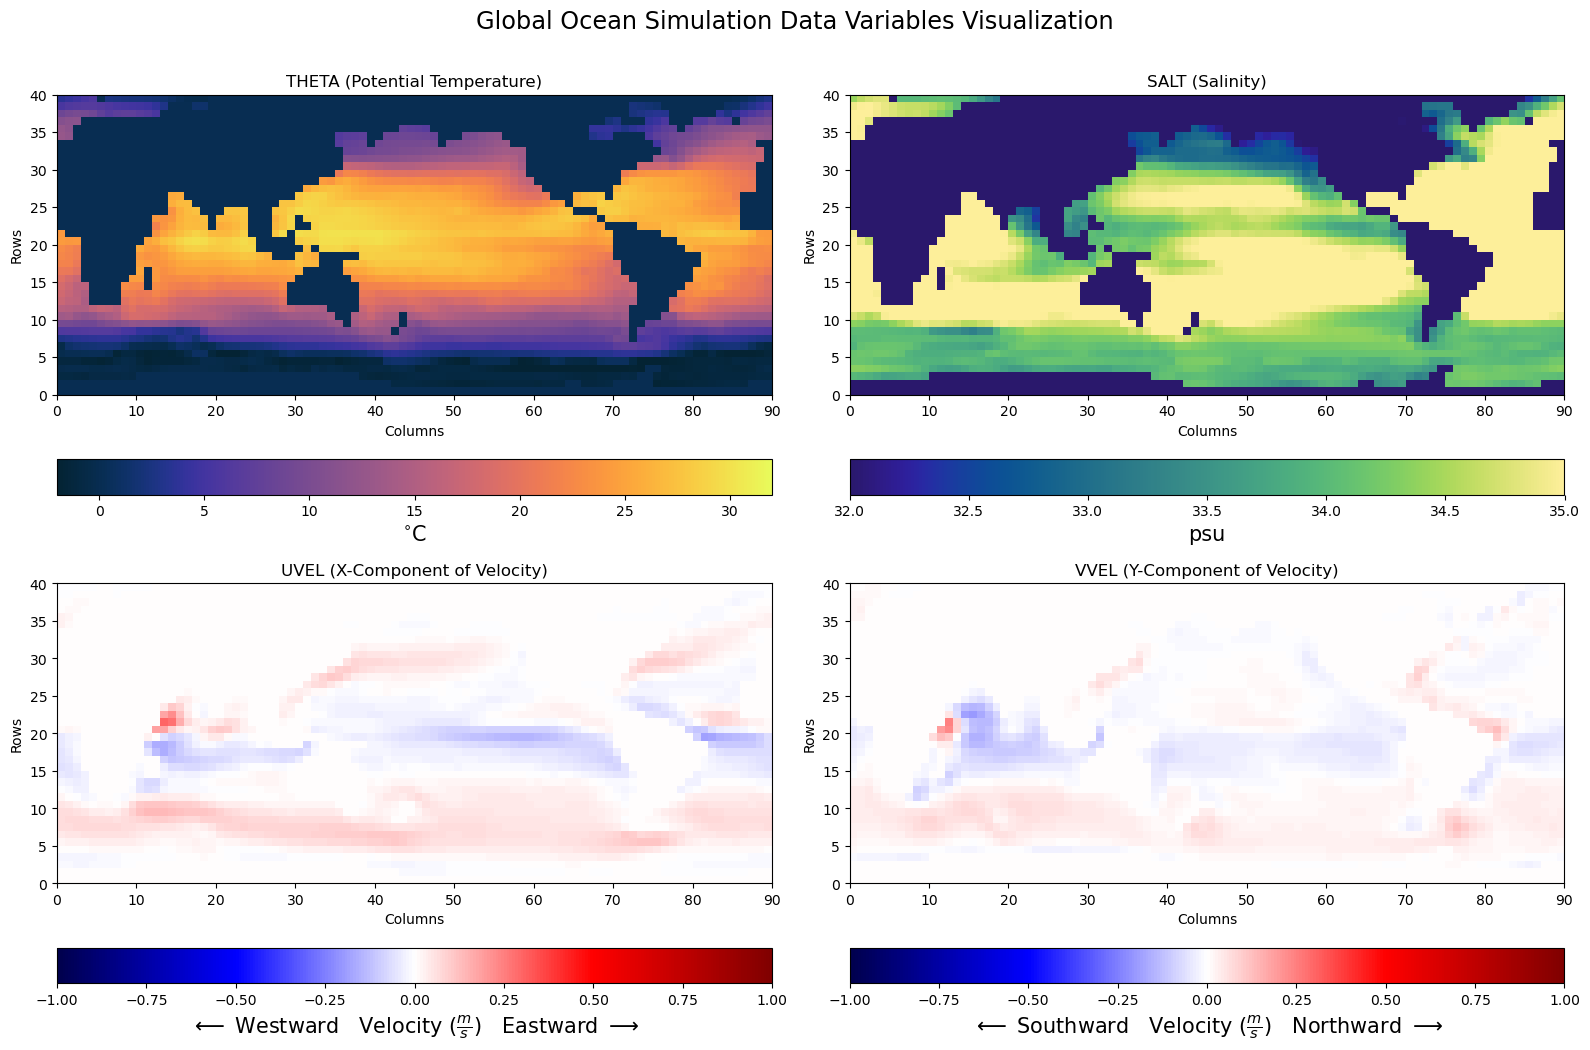

In [14]:
# read in the data from files into grids for theta, salt, uvel, and vvel
data_files = [
    "THETA.0000070445.data",
    "SALT.0000070445.data",
    "UVEL.0000070445.data",
    "VVEL.0000070445.data",
]

titles = [
    "THETA (Potential Temperature)",
    "SALT (Salinity)",
    "UVEL (X-Component of Velocity)",
    "VVEL (Y-Component of Velocity)",
]

labels = [
    "$^{\circ} \\text{C}$",
    "psu",
    "$\longleftarrow$ Westward   Velocity ($\\frac{m}{s}$)   Eastward $\longrightarrow$",
    "$\longleftarrow$ Southward   Velocity ($\\frac{m}{s}$)   Northward $\longrightarrow$"
]

cmaps = [ccm.thermal, ccm.haline, 'seismic', 'seismic']

vmins = [-2.0, 32.0, -1.0, -1.0]

vmaxs = [32.0, 35.0, 1.0, 1.0]


# make the 2x2 plot here
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
axs = [ax1, ax2, ax3, ax4]

for index, (ax, data_file, title, label, cmap, vmin, vmax) in enumerate(
    zip(axs, data_files, titles, labels, cmaps, vmins, vmaxs)
):
    ax = ax

    data_path = model_dir / "run" / data_file
    data_grid = np.fromfile(data_path, ">f4").reshape((n_rows, n_cols))
    c = ax.pcolormesh(data_grid,  cmap=cmap, vmin=vmin, vmax=vmax)

    cbar = fig.colorbar(
        c,
        ax=ax,
        location="bottom",
    )

    cbar.set_label(label, fontsize=15, rotation=0, y=1.10)

    ax.set_title(title)

    ax.set_xlabel("Columns")

    ax.set_ylabel("Rows")

plt.tight_layout()

fig.suptitle(
    "Global Ocean Simulation Data Variables Visualization", y=1.05, fontsize="xx-large"
);

#### Questions

How do these fields compare to those from lecture 2-1 and homework 2? What features are consistent between the models? What features are different? Identify at least two real oceanographic features simulated in this simple model of the ocean.

##### Answer:

Lecture 2–1 & Homework 02 Velocity Plot:

![Lecture 2–1 & Homework 02 Velocity Plots](images/hw02_velocity_plots.png)

Homework 02 THETA Plot:

![Homework 02 THETA Plot](images/hw02_theta_plots.png)

This notebook, Lecture 2–1, and Homework 2 all have similar shading where the prominent of blues and reds in the plot of this notebook are also mapped on the velocity plots in the previous notebooks. There are some differences, though. The previous notebooks' plots are finer in detail. The plots here are pixelated.

Oceanographic Features:

1. Observing the Temperature plot, there does show warmer waters on the East coast where as the West coast has cooler water temperatures. The Gulf stream is contributing to the East coast warm water where the warm water from the Caribbean sea is traveling north.
2. In the Salinity plot, it is observed that the gyres are visible in the Pacific ocean region. There is a distinct division that is caused by the Coriolis effect in the Hadley cell.

